In [57]:

import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    "../data/PreprocessedBinaryBrainTumorDataset/Training",
    image_size=(224, 224),
    batch_size=32,
    color_mode="grayscale",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=123
)

val_dataset = image_dataset_from_directory(
    "../data/PreprocessedBinaryBrainTumorDataset/Training",
    image_size=(224, 224),
    batch_size=32,
    color_mode="grayscale",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 5712 files belonging to 2 classes.
Using 4570 files for training.
Found 5712 files belonging to 2 classes.
Using 1142 files for validation.


In [59]:
# Validate the number of images in training and validation datasets
train_count = sum([len(images) for images, _ in train_dataset])
val_count = sum([len(images) for images, _ in val_dataset])

print(f"Number of training images: {train_count}")
print(f"Number of validation images: {val_count}")


Number of training images: 4570
Number of validation images: 1142


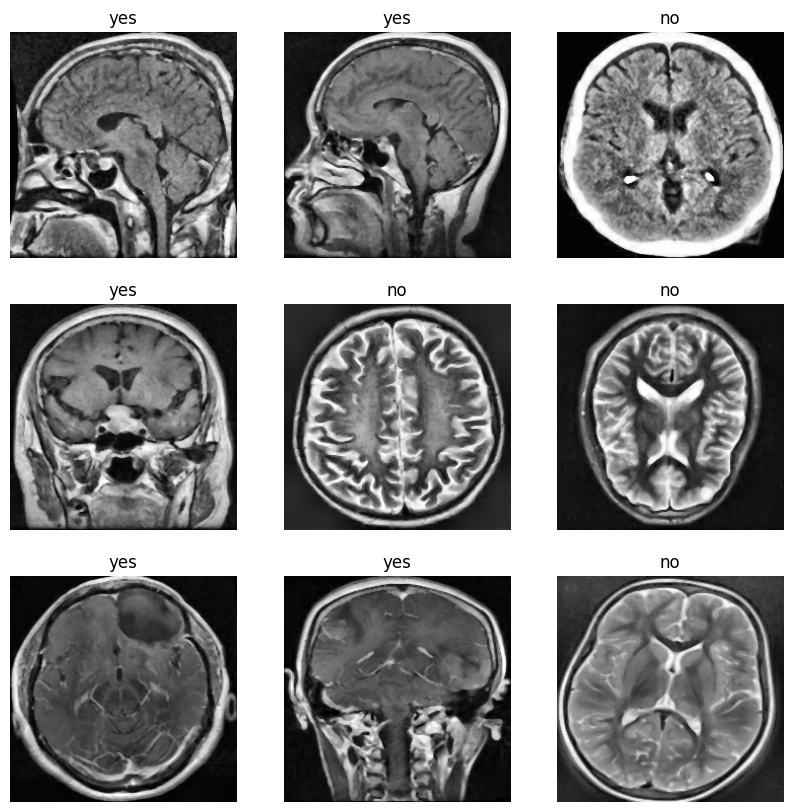

In [60]:
# Visualize some training images
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray")
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [61]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


In [63]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[early_stop, checkpoint]
)

# Save the final model
model.save('final_model.keras') 

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.7905 - loss: 85.3821 - val_accuracy: 0.9448 - val_loss: 0.1853
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9582 - loss: 0.1347 - val_accuracy: 0.9676 - val_loss: 0.1199
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9786 - loss: 0.0692 - val_accuracy: 0.9755 - val_loss: 0.1147
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9880 - loss: 0.0423 - val_accuracy: 0.9729 - val_loss: 0.1362
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9903 - loss: 0.0274 - val_accuracy: 0.9746 - val_loss: 0.1665
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9933 - loss: 0.0255 - val_accuracy: 0.9755 - val_loss: 0.1247
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9932 - loss: 0.0197 - val_accuracy: 0.9711 - val_loss: 0.1465
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9917 - loss: 0.0281 -

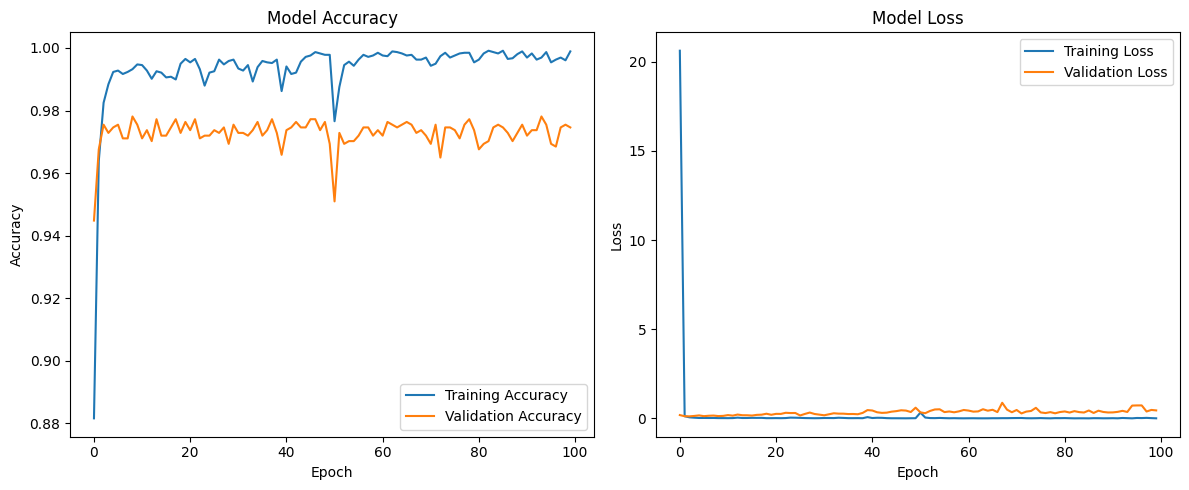

In [64]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()